In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
# from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

import warnings
import seaborn as sns 
from itertools import cycle
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('bmh')
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
warnings.filterwarnings("ignore")
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
sales_df = pd.read_csv(Path('../Resources/WMT_Weekly_Sales_rev.csv'))
sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Rev_Date,index_id,Month,Year,Week
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106,5/2/2010,1-2010-05-02,5,2010,17
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106,12/2/2010,1-2010-12-02,12,2010,48
2,1,2/19/2010,1611968.17,0,39.93,2.514,211.289143,8.106,2/19/2010,1-2010-02-19,2,2010,7
3,1,2/26/2010,1409727.59,0,46.63,2.561,211.319643,8.106,2/26/2010,1-2010-02-26,2,2010,8
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106,5/3/2010,1-2010-05-03,5,2010,18


In [17]:
sales_df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Rev_Date         object
index_id         object
Month             int64
Year              int64
Week              int64
dtype: object

In [3]:
sales_df2 = sales_df['Weekly_Sales']
sales_df2.index.freq = 'WS'

train_data = sales_df2.iloc[:4826]
test_data = sales_df2.iloc[4826:]

In [14]:
span = 1609
alpha = 2/(span+1)
simpleExpSmooth_model = SimpleExpSmoothing(train_data).fit(smoothing_level=alpha,optimized=False)
doubleExpSmooth_model = ExponentialSmoothing(train_data,trend='add',seasonal_periods=1609).fit()
tripleExpSmooth_model = ExponentialSmoothing(train_data,trend='add',seasonal='add',seasonal_periods=1609).fit()


In [15]:
predictions_simpleExpSmooth_model = simpleExpSmooth_model.forecast(1609)
predictions_doubleExpSmooth_model = doubleExpSmooth_model.forecast(1609)
predictions_tripleExpSmooth_model = tripleExpSmooth_model.forecast(1609)

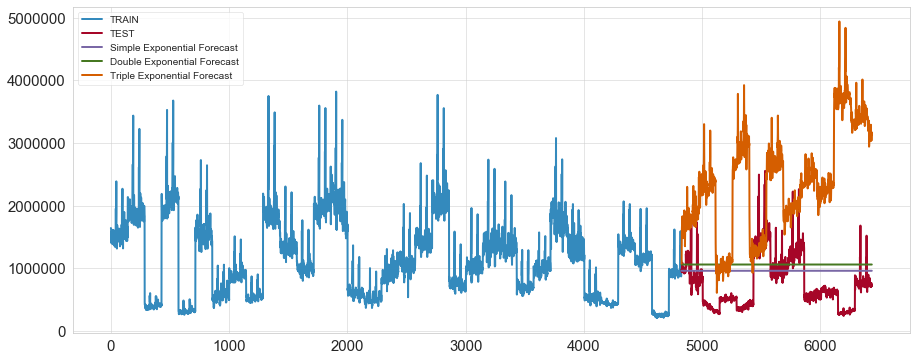

In [16]:
train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',figsize=(15,6))
predictions_simpleExpSmooth_model.plot(legend=True,label='Simple Exponential Forecast')
predictions_doubleExpSmooth_model.plot(legend=True,label='Double Exponential Forecast')
predictions_tripleExpSmooth_model.plot(legend=True,label='Triple Exponential Forecast');

In [7]:
print('Simple Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data,predictions_simpleExpSmooth_model))))
print('Double Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data,predictions_doubleExpSmooth_model))))
print('Triple Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data,predictions_tripleExpSmooth_model))))

Simple Exponential Smoothing RMSE: 393830.8403
Double Exponential Smoothing RMSE: 491093.5953
Triple Exponential Smoothing RMSE: 806680.4600


In [8]:
test_data.std()

376594.8810404642

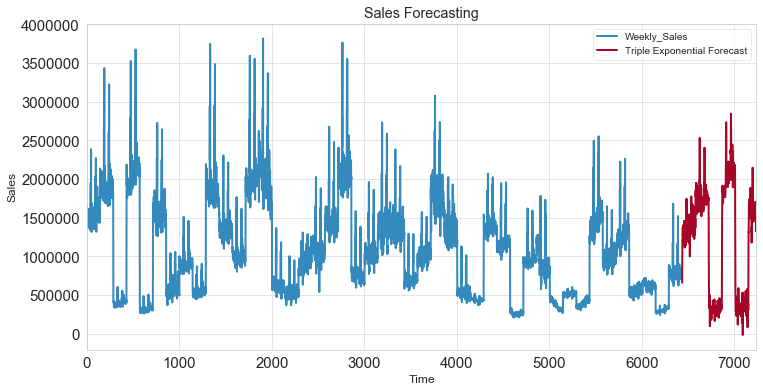

In [9]:
model = ExponentialSmoothing(sales_df['Weekly_Sales'],trend='add',seasonal='add',seasonal_periods=1609)
results = model.fit()
fcast = results.predict(len(sales_df),len(sales_df)+803).rename('Triple Exponential Forecast')

# Plot predictions against known values
title = 'Sales Forecasting'
ylabel='Sales'
xlabel='Time'

ax = sales_df['Weekly_Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
